In [96]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [97]:
#model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=15-val_loss=0.28.ckpt'
model_result_dir = '/data/exjobb/sarssw/result_predictions/best_val_loss-epoch=41-val_loss=0.28.ckpt'
#model_result_dir = '/data/exjobb/sarssw/result_predictions/latest-epoch-epoch=56.ckpt'

In [98]:
# Read results
with open(os.path.join(model_result_dir, 'results.txt'), 'r') as f:
    print(f.read())

Validation on the train data:
[{'val_loss': 0.18103699386119843, 'val_wave_rmse': 0.27273377776145935, 'val_wind_rmse': 1.173358678817749, 'val_wave_mae': 0.21377983689308167, 'val_wind_mae': 0.9337227940559387}]
Validation on the validation data:
[{'val_loss': 0.2686779499053955, 'val_wave_rmse': 0.4298397898674011, 'val_wind_rmse': 1.5669156312942505, 'val_wave_mae': 0.3237841725349426, 'val_wind_mae': 1.267972707748413}]
Test result on the test data:
[{'test_loss': 0.26729997992515564, 'test_wave_rmse': 0.42702803015708923, 'test_wind_rmse': 1.5650643110275269, 'test_wave_mae': 0.32315224409103394, 'test_wind_mae': 1.2554693222045898}]


In [99]:
result_df_final = pd.read_csv(os.path.join(model_result_dir, 'test_predictions.csv')) #train_predictions.csv test_predictions.csv val_predictions.csv

In [100]:
result_df_final

,Unnamed: 0,file_name,target_wave,target_wind,prediction_wave,prediction_wind
0,0,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.530765,8.906387
1,1,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.619478,8.147591
2,2,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.476824,8.419947
3,3,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.581116,10.073983
4,4,S1A_IW_GRDH_1SDV_20210101T000131_20210101T0001...,1.719,10.501644,1.442071,8.388837
...,...,...,...,...,...,...
157224,157224,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.877179,6.155584
157225,157225,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.783010,5.754695
157226,157226,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,2.990009,6.601922
157227,157227,S1B_IW_GRDH_1SDV_20211223T064837_20211223T0649...,3.499,7.564137,3.282276,6.245115


In [101]:
print((result_df_final['target_wave'] == -1).sum())
print((result_df_final['target_wind'] == -1).sum())

0
0


In [102]:
wave_mask = result_df_final['target_wave'] != -1
wave_result_df = result_df_final[wave_mask][['target_wave', 'prediction_wave']]
display(wave_result_df)

wind_mask = result_df_final['target_wind'] != -1
wind_result_df = result_df_final[wind_mask][['target_wind', 'prediction_wind']]
display(wind_result_df)

,target_wave,prediction_wave
0,1.719,1.530765
1,1.719,1.619478
2,1.719,1.476824
3,1.719,1.581116
4,1.719,1.442071
...,...,...
157224,3.499,2.877179
157225,3.499,2.783010
157226,3.499,2.990009
157227,3.499,3.282276


,target_wind,prediction_wind
0,10.501644,8.906387
1,10.501644,8.147591
2,10.501644,8.419947
3,10.501644,10.073983
4,10.501644,8.388837
...,...,...
157224,7.564137,6.155584
157225,7.564137,5.754695
157226,7.564137,6.601922
157227,7.564137,6.245115


In [103]:
def scatterplot_and_heatmaps(df, name_text, unit, target_column, prediction_column, alpha=0.01):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    axs[0].scatter(df[target_column], df[prediction_column], alpha=alpha)
    axs[0].plot([0, 1], [0, 1], color='black', transform=axs[0].transAxes, label='Identity line x=y') #Plot identity line
    axs[0].set_title('Scatterplot for ' + name_text)
    axs[0].set_xlabel(f"Target {name_text} [{unit}]")
    axs[0].set_ylabel(f"Predicted {name_text} [{unit}]")
    axs[0].legend()

    (h2d_h, h2d_xedg, h2d_yedg, h2d_img) = axs[1].hist2d(df[target_column], df[prediction_column], bins=100, norm=mpl.colors.LogNorm(clip=True))
    axs[1].plot([0, 1], [0, 1], color='black', transform=axs[1].transAxes, label='Identity line x=y') #Plot identity line
    axs[1].set_title('Heatmap for ' + name_text + ', log scaled colormap')
    axs[1].set_xlabel(f"Target {name_text} [{unit}]")
    axs[1].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(h2d_img, ax=axs[1], label='Count colormap')
    axs[1].legend()

    hist = h2d_h.copy().T
    with np.errstate(divide='ignore', invalid='ignore'):  # suppress division by zero warnings
        hist *= 1 / hist.sum(axis=0, keepdims=True)
        
    #Remove nans, to remove white columns
    hist[np.isnan(hist)] = 0

    pcm = axs[2].pcolormesh(h2d_xedg, h2d_yedg, hist, norm=mpl.colors.LogNorm(clip=True))
    axs[2].plot([0, 1], [0, 1], color='black', transform=axs[2].transAxes, label='Identity line x=y') #Plot identity line
    axs[2].set_title('Heatmap for ' + name_text + ', normalized columns, log scaled colormap')
    axs[2].set_xlabel(f"Target {name_text} [{unit}]")
    axs[2].set_ylabel(f"Predicted {name_text} [{unit}]")
    fig.colorbar(pcm, ax=axs[2], label='Frequency colormap')
    axs[2].legend()

    display(fig)
    plt.close()

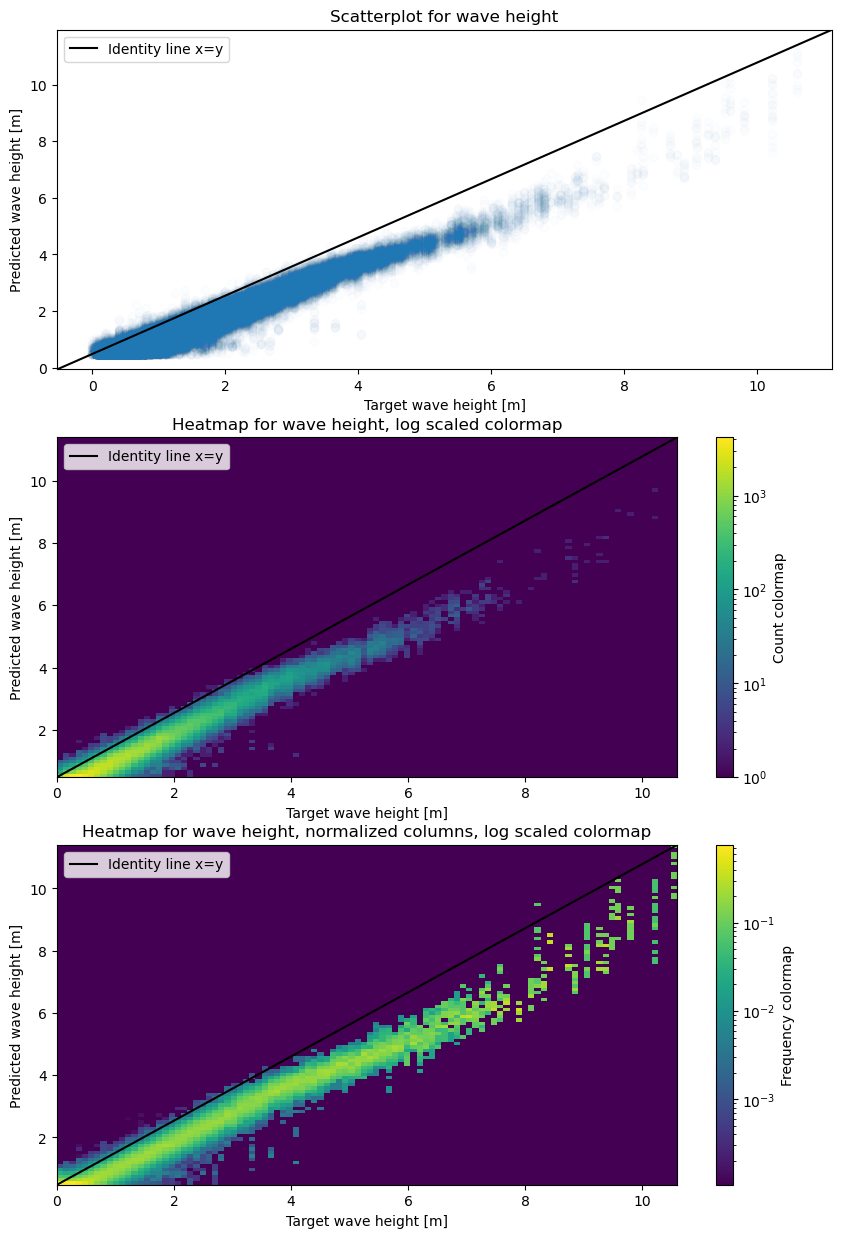

In [104]:
scatterplot_and_heatmaps(wave_result_df, "wave height", "m", "target_wave", "prediction_wave")

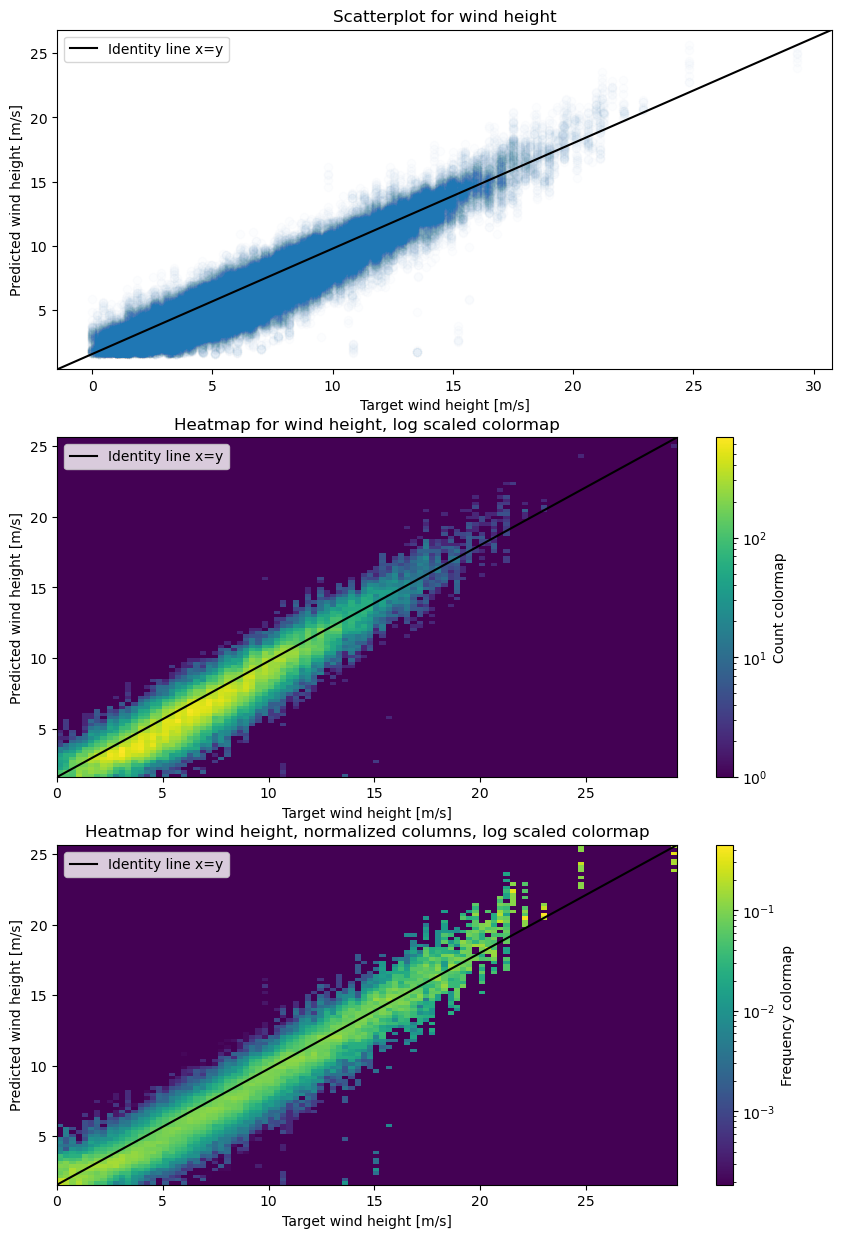

In [105]:
scatterplot_and_heatmaps(wind_result_df, "wind height", "m/s", "target_wind", "prediction_wind")